# Перекрестная проверка и решетчатый поиск 

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Перекрестная проверка 

In [3]:
import pandas as pd

Идея **кросс-валидации** заключается в том, чтобы разделить ваш набор данных на обучающую и тестовую выборки несколько раз и вычислить показатели производительности модели для каждого разделения. Таким образом, вы получаете более устойчивую оценку производительности, чем при единственном разделении данных.

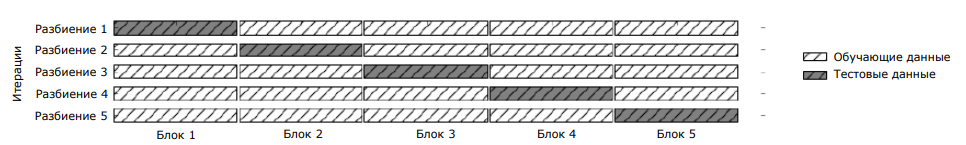

In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

In [5]:
iris_info = load_iris()
iris_data = iris_info.data
iris_target = iris_info.target

In [6]:
log_reg = LogisticRegression()  # модель строится тут

In [11]:
scores = cross_val_score(log_reg, iris_data, iris_target, cv=5)  # проверяется уже построенаня модель
scores

array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])

In [12]:
scores.mean() # среднее значение, чтобы подытожим правильность

0.9733333333333334

*Основной недостаток перекрестной проверки – увеличение вычислений, тк теперь мы обучаем k моделей вместо одной 
модели*

Важно помнить, что кросс-валидация не является способом 
построения модели, которую можно применить к новым данным. 
Перекрестная проверка не возвращает модель. При вызове 
**cross_val_score** строится несколько внутренних моделей, однако
цель перекрестной проверки заключается только в том, чтобы 
*оценить обобщающую способность данного алгоритма*, обучив на 
определенном наборе данных.

### Cтратифицированная перекрестная проверка

Это вариация метода кросс-валидации, которая обеспечивает сохранение баланса классов в обучающих и тестовых наборах данных. Это особенно важно, когда у вас есть несбалансированный набор данных, то есть, когда количество примеров различных классов существенно отличается. Происходит разделение классов и сохранение пропорций для обучающего и тестового набора.

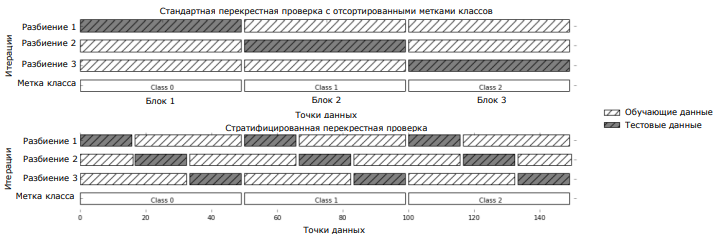

In [13]:
from sklearn.model_selection import StratifiedKFold

stratif_kfold = StratifiedKFold(n_splits=5, shuffle=True)

model = LogisticRegression()

scores = cross_val_score(model, iris_data, iris_target, cv=stratif_kfold)
scores

array([0.96666667, 1.        , 1.        , 0.93333333, 0.96666667])

### Контроль над перекрёстной проверкой

Можно настроить количество блоков, 
используемое в **cross_val_score**, с помощью параметра **cv**. Однако 
scikit-learn позволяет значительно точнее настроить процесс
перекрестной проверки, используя в качестве параметра cv генератор 
разбиений перекрестной проверки (cross-validation splitter).

In [14]:
from sklearn.model_selection import KFold

In [15]:
kfold = KFold(n_splits=3)

cross_val_score(log_reg, iris_data, iris_target, cv=kfold) # потому что данные упорядочены по меткам

array([0., 0., 0.])

In [16]:
iris_target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [17]:
kfold = KFold(n_splits=3, shuffle=True)
cross_val_score(log_reg, iris_data, iris_target, cv=kfold)

array([0.94, 0.98, 0.98])

### Исключение по одному

Перекрестную проверку с 
исключением по одному можно представить в виде k-блочной 
перекрестной проверки, в которой каждый блок представляет собой 
отдельный пример. По каждому разбиению вы выбираете одну точку 
данных в качестве тестового набора. Этот вид проверки может занимать 
очень много времени, особенно при работе с большими наборами данных, 
однако иногда позволяет получить более точные оценки на небольших 
наборах данных

In [18]:
from sklearn.model_selection import LeaveOneOut
log_reg = LogisticRegression(max_iter=1000)
leave_one_out = LeaveOneOut()
scores = cross_val_score(log_reg, iris_data, iris_target, cv=leave_one_out)
scores

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [19]:
scores.mean()

0.9666666666666667

### Перекрестная проверка со случайными перестановками при разбиении

 В этом виде проверки каждое разбиение 
выбирает train_size точек для обучающего набора и test_size точек для 
тестового набора (при этом обучающее и тестовое подмножества не 
пересекаются). Точки выбираются с возвращением. Разбиение
повторяется n_iter раз.

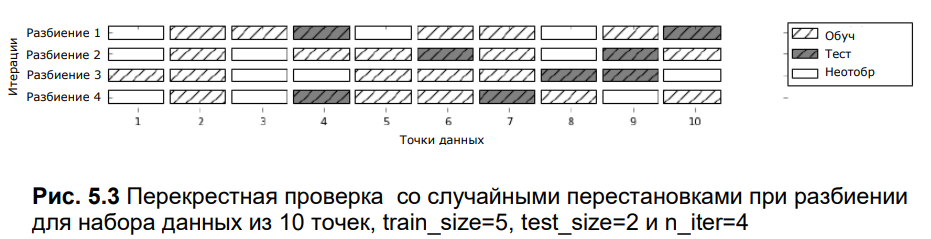

In [20]:
from sklearn.model_selection import ShuffleSplit

shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10) # значения с точкой - пропорции

scores = cross_val_score(log_reg, iris_data, iris_target, cv=shuffle_split)
scores

array([0.93333333, 0.98666667, 0.92      , 0.93333333, 0.98666667,
       0.96      , 0.96      , 0.97333333, 0.93333333, 0.97333333])

In [21]:
scores.mean()

0.9559999999999998

*Существует также стратифицированный вариант ShuffleSplit, 
названный **StratifiedShuffleSplit**, который позволяет получить более 
надежные результаты при решении задач классификации.*


### Перекрестная проверка с использованием групп

Перекрестная проверка с использованием групп (GroupKFold или другие аналогичные методы) полезна в ситуациях, когда данные могут содержать внутренние зависимости или корреляции между примерами, которые необходимо учесть при оценке производительности модели. Это может быть актуально, например, в случае анализа медицинских данных, временных рядов или данных, собранных с участием различных групп.

In [22]:
from sklearn.datasets import make_blobs

In [23]:
from sklearn.model_selection import GroupKFold

# создаем синтетический набор данных
X, y = make_blobs(n_samples=12, random_state=0)

# предположим, что первые три примера относятся к одной и той же группе,
# затем следующие четыре и так далее.
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]

scores = cross_val_score(log_reg, X, y, groups=groups, cv=GroupKFold(n_splits=3))

In [24]:
scores

array([0.75      , 0.6       , 0.66666667])

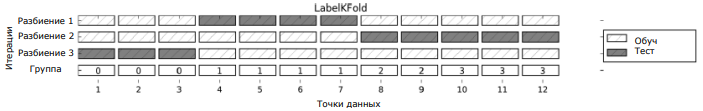

## Решетчатый поиск

Простой решетчатый поиск - попытка перебрать значения параметров

In [25]:
# реализация наивного решетчатого поиска

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris_info.data, iris_info.target, random_state=0)
print("Размер обучающего набора: {} размер тестового набора: {}".format(X_train.shape[0], X_test.shape[0]))
best_score = 0
 
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # для каждой комбинации параметров обучаем SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # оцениваем качество SVC на тестовом наборе
        score = svm.score(X_test, y_test)
        # если получаем наилучшее значение правильности, сохраняем значение и параметры
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
    
print("Наилучшее значение правильности: {:.2f}".format(best_score))
print("Наилучшие значения параметров: {}".format(best_parameters))

Размер обучающего набора: 112 размер тестового набора: 38
Наилучшее значение правильности: 0.97
Наилучшие значения параметров: {'C': 100, 'gamma': 0.001}


*Мы перебрали множество 
значений параметров и выбрали ту комбинацию значений, которая дает 
наилучшую правильность на тестовом наборе, но это вовсе не означает, 
что на новых данных мы получим такое же значение правильности. 

!!!!
Поскольку мы использовали тестовый набор для настройки параметров, 
мы больше не можем использовать его для оценки качества модели.*

Один из способов решения этой проблемы заключается в том, чтобы
разбить данные еще раз, таким образом, мы получаем три набора: 
**обучающий набор** для построения модели, **проверочный**
(валидационный) набор для выбора параметров модели, а также 
**тестовый набор** для оценки качества работы выбранных параметров.

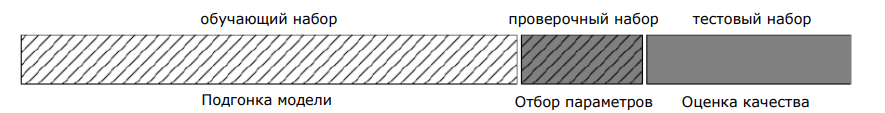

После выбора наилучших параметров с помощью проверочного 
набора проверки, мы можем заново построить модель, используя 
найденные настройки, но теперь на основе объединенных обучающих и 
проверочных данных. Таким образом, мы можем использовать для 
построения модели максимально возможное количество данных.

In [26]:
# Разбиваем данные на обучающий+проверочный набор и тестовый набор
X_trainval, X_test, y_trainval, y_test = train_test_split(
    iris_info.data, iris_info.target, random_state=0)

# Разбиваем обучающий+проверочный набор на обучающий и проверочный наборы
X_train, X_valid, y_train, y_valid = train_test_split(
    X_trainval, y_trainval, random_state=1)

print("Размер обучающего набора: {} размер проверочного набора: {} размер тестового набора: {}\n".format(
    X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

best_score = 0
best_parameters = {}

# Перебираем комбинации параметров gamma и C
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # Обучаем SVC для каждой комбинации параметров
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)

        # Оцениваем качество SVC на проверочном наборе
        score = svm.score(X_valid, y_valid)

        # Если получаем наилучшее значение правильности, сохраняем значение и параметры
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

# Переобучаем модель на объединенном обучающем и проверочном наборах
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

# Оцениваем качество модели на тестовом наборе
test_score = svm.score(X_test, y_test)

# Выводим результаты
print("Лучшее значение правильности на проверочном наборе: {:.2f}".format(best_score))
print("Наилучшие значения параметров: ", best_parameters)
print("Правильность на тестовом наборе с наилучшими параметрами: {:.2f}".format(test_score))

Размер обучающего набора: 84 размер проверочного набора: 28 размер тестового набора: 38

Лучшее значение правильности на проверочном наборе: 0.96
Наилучшие значения параметров:  {'C': 10, 'gamma': 0.001}
Правильность на тестовом наборе с наилучшими параметрами: 0.92


Поскольку решетчатый поиск с перекрестной проверкой является 
весьма распространенным методом настройки параметров, библиотека
scikit-learn предлагает класс GridSearchCV, в котором решетчатый 
поиск реализован в виде модели. Чтобы воспользоваться классом
**GridSearchCV**, сначала необходимо указать искомые параметры с
помощью словаря. GridSearchCV построит все необходимые модели. 
Ключами словаря являются имена настраиваемых параметров (в данном
случае С и gamma), а значениями – тестируемые настройки параметров.

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

X_train, X_test, y_train, y_test = train_test_split(iris_info.data, iris_info.target, random_state=0)

In [29]:
model = SVC()
grid_search = GridSearchCV(model, param_grid)
grid_search.fit(X_train, y_train) # обучение моделей

grid_search.score(X_test, y_test)

0.9736842105263158

Главный момент здесь в том, что мы не использовали 
тестовый набор для отбора параметров. Найденная комбинация 
параметров сохраняется в атрибуте **best_params_**, а наилучшее значение 
правильности перекрестной проверки (значение правильности, 
усредненное по всем разбиениям для данной комбинации параметров) –
в атрибуте **best_score_**

In [30]:
grid_search.best_estimator_

SVC(C=10, gamma=0.1)

In [31]:
grid_search.best_params_

{'C': 10, 'gamma': 0.1}

In [32]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002399,0.000622,0.001485,0.001119,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
1,0.002095,0.000131,0.000861,0.000437,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
2,0.002554,0.002091,0.000000,0.000000,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
3,0.003296,0.001652,0.000409,0.000818,0.001,1,"{'C': 0.001, 'gamma': 1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
4,0.002507,0.002053,0.000000,0.000000,0.001,10,"{'C': 0.001, 'gamma': 10}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
5,0.003724,0.000608,0.000000,0.000000,0.001,100,"{'C': 0.001, 'gamma': 100}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
6,0.001663,0.002039,0.000000,0.000000,0.01,0.001,"{'C': 0.01, 'gamma': 0.001}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
7,0.001745,0.001940,0.000802,0.001603,0.01,0.01,"{'C': 0.01, 'gamma': 0.01}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
8,0.003133,0.001582,0.000000,0.000000,0.01,0.1,"{'C': 0.01, 'gamma': 0.1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
9,0.001679,0.002057,0.000805,0.001609,0.01,1,"{'C': 0.01, 'gamma': 1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22


*Опять же, будьте осторожны, чтобы не перепутать **best_score_** со 
значением обобщающей способности модели, которое 
вычисляется на тестовом наборе с помощью метода score. **Метод
score** (оценивающий качество результатов, полученных с 
помощью метода predict) использует модель, построенную на 
всем обучающем наборе данных. В атрибуте best_score_
записывается средняя правильность перекрестной проверки. Для 
ее вычисления используется модель, построенная на обучающем
наборе перекрестной проверки.*

In [33]:
grid_search.best_score_

0.9731225296442687

Настройка сетки параметров с помощью перекрестной проверки – это 
хороший способ исследовать важность различных параметров. Однако, 
как мы уже обсуждали ранее, значения различных параметров не должны 
проверяться на итоговом тестовом наборе, качество модели на тестовом 
наборе должно оцениваться лишь один раз, когда мы точно знаем, какую 
модель хотим использовать.

In [34]:
# если есть условные параметры

param_grid = [{'kernel': ['rbf'],'C': [0.001, 0.01, 0.1, 1, 10, 100],'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},{'kernel': ['linear'],'C': [0.001, 0.01, 0.1, 1, 10, 100]}]

In [ ]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Наилучшие значения параметров: {}".format(grid_search.best_params_))
print("Наилучшее значение кросс-валидац. правильности: {:.2f}".format(grid_search.best_score_))

Как и cross_val_score, GridSearchCV использует по умолчанию k-блочную перекрестную проверку для классификации и k-блочную
перекрестную проверку для регрессии. Однако при использовании 
GridSearchCV вы можете дополнительно передать любой генератор 
разбиения (как было описано в разделе «Больше контроля над 
перекрестной проверкой») в качестве параметра cv. В частности, чтобы 
получить только одно разбиение на обучащий и проверочный наборы, вы 
можете воспользоваться ShuffleSplit или StratifiedShuffleSplit с 
n_iter=1. Данная настройка может оказаться полезной для очень 
больших наборов данных или очень медленных моделей

In [ ]:
# ВЛОЖЕННАЯ ПЕРЕКРЕСТНАЯ ПРОВЕРКА

In [ ]:
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5), iris_info.data, iris_info.target, cv=5)
print("Значения правильности перекрестной проверки: ", scores)
print("Среднеее значение правильности перекрестной проверки: ", scores.mean())

Во вложенной
перекрестной проверке используется внешний цикл по разбиениям
данных на обучающий и тестовый наборы. Для каждого из них
выполняется решетчатый поиск (в результате чего для каждого 
разбиения внешнего цикла можно получить разные наилучшие 
параметры). Затем для каждого внешнего разбиения выводится 
правильность на тестовом наборе с использованием наилучших 
параметров.
Результатом этой процедуры является не модель и не настройки 
параметров, а список значений правильности. Значения правильности
указывают нам на обобщающую способность модели с использованием 
лучших параметров, найденных в ходе решетчатого поиска.

В данном случае мы использовали стратифицированную
пятиблочную перекрестную проверку как во внутреннем, так и во 
внешнем циклах. Поскольку наша сетка param_grid содержит 36 
комбинаций параметров, будет построено целых 36 * 5 * 5 = 900 моделей, 
что делает процедуру вложенной перекрестной проверки очень затратной 
с вычислительной точки зрения.

Несмотря на то, что выполнение решетчатого поиска с большим 
количеством параметров на огромных наборах данных может 
представлять сложность с вычислительной точки зрения, эта задача 
является чрезвычайно параллельной (embarrassingly parallel). Это 
означает, что построение модели с использованием конкретной 
настройки параметра для конкретного разбиения перекрестной проверки 
может осуществляться независимо от других настроек параметров и 
моделей. Данный факт делает решетчатый поиск и перекрестную 
проверку идеальными кандидатами для распараллеливания по
нескольким процессорным ядрам или распараллеливания на кластере. В
GridSearchCV и cross_val_score вы можете использовать несколько 
процессорных ядер, задав значение параметра n_jobs равным нужному 
количеству ядер. Вы можете установить n_jobs=-1, чтобы использовать 
все доступные ядра.
